In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\chetr\\Documents\\class materials\\SECOND SEMESTER\\Krish_naik\\PROJECTS\\2. AQI\\Real_combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


# Now first we will do feature engineering

In [4]:
## To see null value wrt each columns
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

<AxesSubplot:>

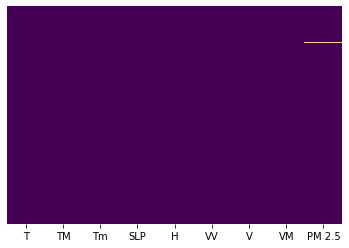

In [5]:
## to visualise null value using seaborn heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df=df.dropna()

In [7]:
## Now i shall create my dependent and independent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [9]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

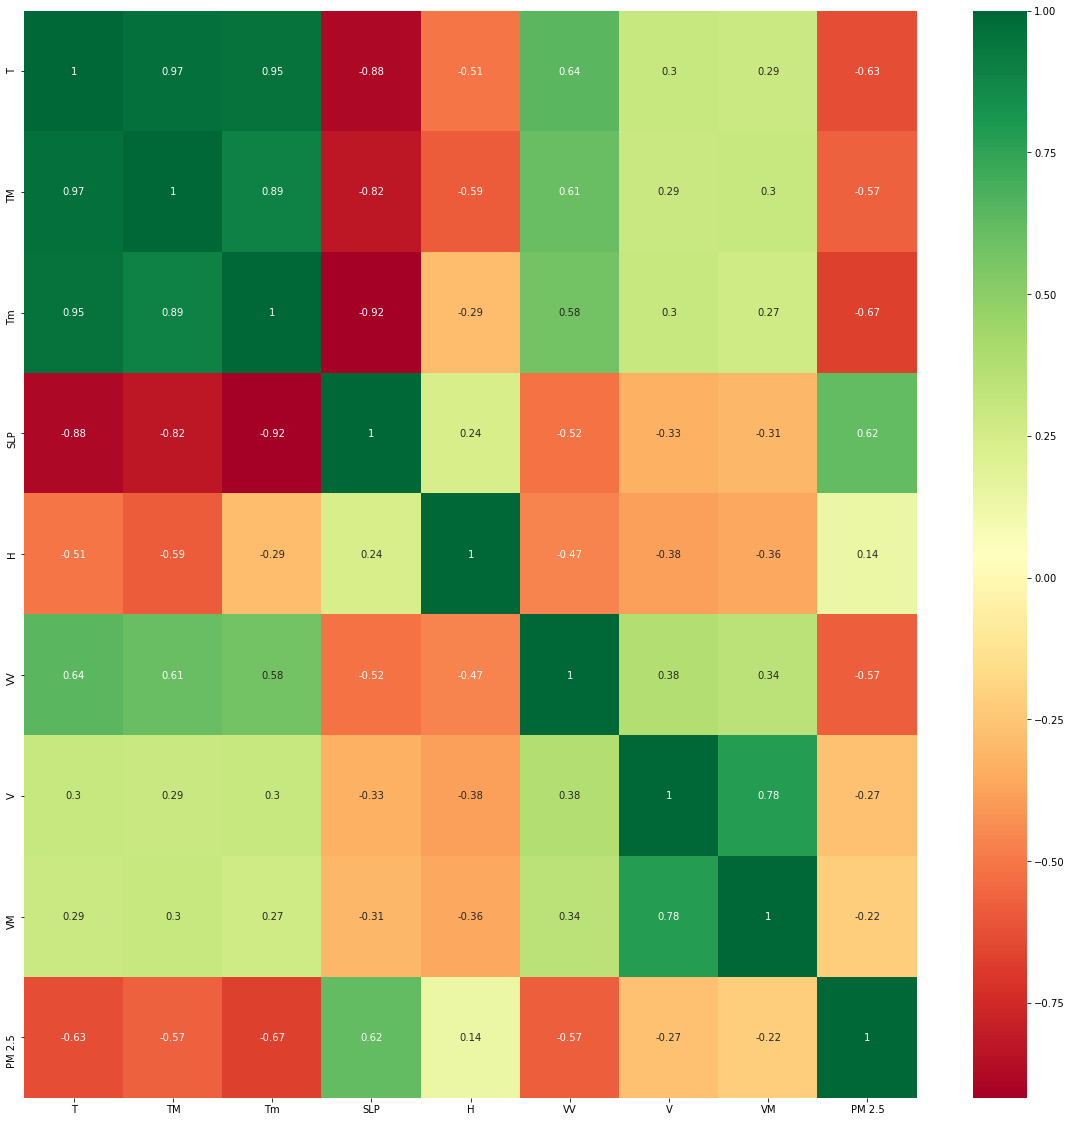

In [10]:
#### we can also create correlation with Heat Map
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [12]:
print(model.feature_importances_)

[0.22604117 0.09792337 0.17278859 0.14538903 0.08913135 0.17394598
 0.05250525 0.04227525]


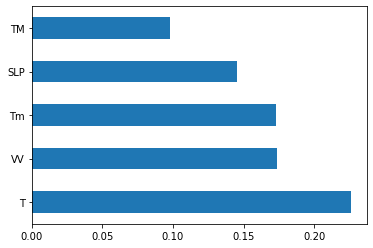

In [13]:
### Now we shall plot the graph of important features just to visualise it and i shall see top 5 important features
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\chetr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

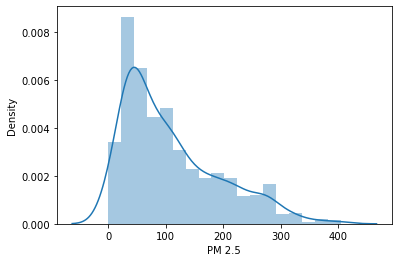

In [14]:
sns.distplot(y)

---

# Decision Tree Regressor

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:

### here i havenot given any other parameters, so DT will automatically divide and go until its depth and last leaf node

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [19]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [20]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.6999804413672519


Here i see for my Training data i'm getting a good fit i.e. R square value, whereas for test data is reduced.

 It is an overfitting condition. we have to prune this decesion tree through Hyperparameter Tuning

In [21]:
## so now we shall apply CROSS-VALIDATION, In CV automatically data gets divide into test and train so we avoid X_train,y_train
## Instead apply just X,y

from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [22]:
score.mean() ## Even after applying CROSS VALIDATION the accuracy (i.e. mean of 5 times iterated R score is still less)

0.4517714873800541

Even after applying CV accuracy is less, for now lets proceed with this. Later we will be doing Hyper Parameter Tuning

 ---

# Model Evaluation

In [23]:
prediction=dtree.predict(X_test)

C:\Users\chetr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

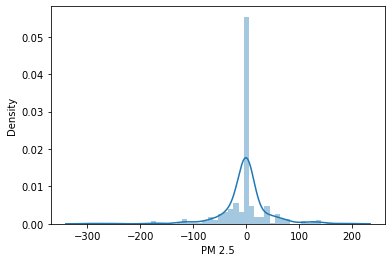

In [24]:
sns.distplot(y_test-prediction)

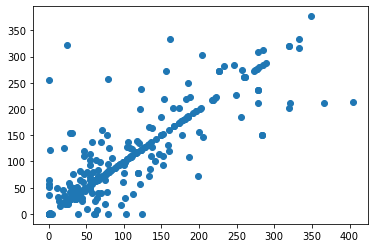

In [25]:
plt.scatter(y_test,prediction)

---


# HYPER PARAMETER TUNING

In [26]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [27]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [28]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [29]:
### To check how much time it takes to train my model
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [30]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 1 minutes and 32.18 seconds.


In [31]:
random_search.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [32]:
random_search.best_score_

-3131.6489619178874

In [33]:
predictions=random_search.predict(X_test)

C:\Users\chetr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

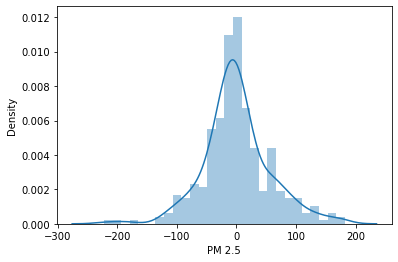

In [34]:
sns.distplot(y_test-predictions)

# Regression Evaluation Metrics

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.14163092473942
MSE: 3171.808145980198
RMSE: 56.31880810155874


After Applying Hyperparameter optimization in DT,the Metrics has slightly higher value than Lasso but that doesnot mean DT is bad than Ridge/Lasso.. Infact DT is more generalized model.

Because when you compare the mean of R^2/best_parameter after applying Hypereparameter ooptimization, then DT has given good result in a generalized way